<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/23_genematrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [46]:
inf = pd.read_csv("/content/drive/MyDrive/infection_23.csv", index_col =0)

In [33]:
#y = inf.values.ravel()

In [4]:
expmat = pd.read_csv("/content/drive/MyDrive/COVID000023_exp.csv", index_col = 0)

In [5]:
expmat.shape

(15811, 234)

In [10]:
df = expmat.transpose()

In [22]:
df.iloc[:,0:-1].shape

(234, 15810)

In [24]:
df.to_csv('expmat23.csv')

In [48]:
df = pd.read_csv("expmat23.csv")

In [49]:
columns = {
    'Unnamed: 0': 'rowname'
}

# Use the rename method to update the column names
df = df.rename(columns=columns)

# Check the columns of the DataFrame again
print(df.columns)

Index(['rowname', 'ZZZ3', 'ZZEF1', 'ZYX', 'ZYG11B', 'ZYG11A', 'ZXDC', 'ZXDB',
       'ZXDA', 'ZWINT',
       ...
       'AADACL3', 'AADACL2', 'AADAC', 'AACS', 'AAAS', 'A4GALT', 'A2ML1', 'A2M',
       'A1CF', 'A1BG'],
      dtype='object', length=15812)


In [52]:
from sklearn.model_selection import StratifiedKFold

# Define the features and labels of your dataset
X = df
y = inf

# Create a StratifiedKFold object with 5 folds
skf = StratifiedKFold(n_splits=5)

# Loop through the folds
for train_index, test_index in skf.split(X, y):
    # Get the training and test data for the current fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train your model using the training data and evaluate it on the test data
    ...


In [53]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((188, 15812), (46, 15812), (188, 1), (46, 1))

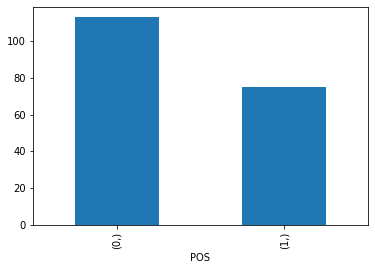

In [55]:
y_train.value_counts().plot.bar()

In [ ]:
#X_train,X_test,y_train and y_test

In [56]:
X_train.corr()

,ZZZ3,ZZEF1,ZYX,ZYG11B,ZYG11A,ZXDC,ZXDB,ZXDA,ZWINT,ZWILCH,...,AADACL3,AADACL2,AADAC,AACS,AAAS,A4GALT,A2ML1,A2M,A1CF,A1BG
ZZZ3,1.000000,0.645995,-0.002203,0.566926,0.294551,0.587703,0.603154,0.566413,0.423427,0.450982,...,0.486593,0.645742,0.540451,0.659171,0.544051,0.610292,0.213185,0.348212,0.372161,0.397811
ZZEF1,0.645995,1.000000,0.335794,0.494443,0.508397,0.736990,0.353838,0.386723,0.300408,0.414720,...,0.603719,0.560203,0.348072,0.687618,0.512932,0.545030,0.433015,0.278467,0.604917,0.713321
ZYX,-0.002203,0.335794,1.000000,0.035398,0.234898,0.250776,-0.175631,-0.195499,-0.001094,0.154394,...,0.208218,-0.213450,-0.304739,0.242439,0.021497,0.054132,0.267587,0.164797,0.503314,0.334373
ZYG11B,0.566926,0.494443,0.035398,1.000000,0.436807,0.661417,0.622412,0.589599,0.504299,0.499069,...,0.478508,0.559675,0.513640,0.658724,0.571699,0.632665,0.276428,0.426118,0.291190,0.367306
ZYG11A,0.294551,0.508397,0.234898,0.436807,1.000000,0.458320,0.193616,0.184545,0.060760,0.335321,...,0.418430,0.314597,0.198660,0.488102,0.350221,0.415729,0.319194,0.144277,0.344511,0.593808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A4GALT,0.610292,0.545030,0.054132,0.632665,0.415729,0.555932,0.540630,0.398183,0.234179,0.423196,...,0.493041,0.511527,0.410498,0.676157,0.463113,1.000000,0.392905,0.110285,0.326730,0.379823
A2ML1,0.213185,0.433015,0.267587,0.276428,0.319194,0.300898,0.145129,0.104177,0.044123,0.231533,...,0.279206,0.161442,0.024479,0.473908,0.256801,0.392905,1.000000,0.150211,0.313608,0.336283
A2M,0.348212,0.278467,0.164797,0.426118,0.144277,0.301923,0.359634,0.424441,0.457870,0.319981,...,0.022264,0.142761,0.206923,0.265191,0.400602,0.110285,0.150211,1.000000,0.066572,0.129651
A1CF,0.372161,0.604917,0.503314,0.291190,0.344511,0.559855,0.041866,0.092109,0.057532,0.296053,...,0.618462,0.360768,0.157535,0.580906,0.269939,0.326730,0.313608,0.066572,1.000000,0.639104


In [57]:
train = pd.concat([X_train,y_train], axis =1)

In [61]:
train['POS']

0      0
1      0
2      0
3      1
4      1
      ..
209    1
210    1
211    1
212    1
214    1
Name: POS, Length: 188, dtype: int64

In [63]:
import pandas as pd



# compute the pairwise correlations between the features and the target
corr = train.corr()

# compute the absolute value of the correlations
corr_abs = corr.abs()

# select only the features with a correlation above 0.5
selected_features = corr_abs.loc[corr_abs['POS'] >= 0.5, 'POS'].index

# create a new dataframe with only the selected features
df_selected = df[selected_features]


KeyError: ignored

In [64]:
selected_features

Index(['LGR6', 'LGALS3BP', 'IFI6', 'IFI27', 'HERC6', 'FAM83A', 'BST2', 'POS'], dtype='object')

In [67]:
#select only those features whose correalation is more than or equals 0.5 to the target variable 
train_7 = train[selected_features]

In [70]:
test = pd.concat([X_test,y_test], axis = 1)

In [72]:
test_7 = test[selected_features]

In [73]:
train_7.shape,test_7.shape

((188, 8), (46, 8))

In [74]:
X_train_7 = train_7.drop(['POS'], axis = 1)

In [75]:
y_train_7 = train_7['POS']

In [76]:
X_test_7 = test_7.drop(['POS'], axis = 1)

In [77]:
y_test_7 = test_7['POS']

In [80]:
X_train_7.shape,X_test_7.shape,y_test_7.shape,y_train_7.shape

((188, 7), (46, 7), (46,), (188,))

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train_7_s = scaler.fit_transform(X_train_7)
X_test_7_s = scaler.transform(X_test_7)

In [95]:
#correlation between independent independent 7 selcted features
X_train_7.corr()

,LGR6,LGALS3BP,IFI6,IFI27,HERC6,FAM83A,BST2
LGR6,1.000000,0.546485,0.419357,0.475922,0.410586,0.551067,0.456520
LGALS3BP,0.546485,1.000000,0.710562,0.667660,0.658594,0.603953,0.705582
IFI6,0.419357,0.710562,1.000000,0.785559,0.803703,0.426442,0.776022
IFI27,0.475922,0.667660,0.785559,1.000000,0.807787,0.489518,0.742819
HERC6,0.410586,0.658594,0.803703,0.807787,1.000000,0.446717,0.710147
FAM83A,0.551067,0.603953,0.426442,0.489518,0.446717,1.000000,0.449025
BST2,0.456520,0.705582,0.776022,0.742819,0.710147,0.449025,1.000000


In [85]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import load_iris

# create a random forest classifier
clf_rf = RandomForestClassifier()

# train the classifier on the iris data
rf = clf_rf.fit(X_train_7_s, y_train_7.values.ravel())




In [86]:
y_pred_rf = clf_rf.predict(X_test_7_s)

In [87]:
from sklearn.metrics import *

In [90]:
acc_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test,y_pred_rf)
rec_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)

In [93]:
f1_rf

0.7428571428571428

In [98]:
import pandas as pd



# compute the pairwise correlations between the features and the target
corr = train.corr()

# compute the absolute value of the correlations
corr_abs = corr.abs()

# select only the features with a correlation above 0.5
selected_features = corr_abs.loc[corr_abs['POS'] >= 0.3, 'POS'].index

In [96]:
selected_features

Index(['IFI27', 'POS'], dtype='object')

In [99]:
train

,rowname,ZZZ3,ZZEF1,ZYX,ZYG11B,ZYG11A,ZXDC,ZXDB,ZXDA,ZWINT,...,AADACL2,AADAC,AACS,AAAS,A4GALT,A2ML1,A2M,A1CF,A1BG,POS
0,GSM4721578,3.345562,4.702545,5.219862,3.672994,1.837502,3.853066,2.456855,2.100035,1.667868,...,4.394019,1.534595,2.653224,3.202121,5.191661,1.924741,4.713352,0.704049,2.674830,0
1,GSM4721579,4.279814,5.203125,6.531373,4.043087,1.860280,4.158042,2.913972,2.476032,1.295154,...,5.852718,1.873902,3.069830,3.130780,4.947965,3.331046,4.184043,1.375493,3.749930,0
2,GSM4721580,3.879256,5.087448,7.094212,4.199015,1.969528,4.546930,3.045830,2.271313,2.083444,...,6.047912,3.014122,3.181115,4.019523,5.551716,3.466246,4.139041,0.905467,3.700790,0
3,GSM4721581,3.540794,5.567660,6.239423,4.380194,1.429195,4.139639,3.106655,2.326469,2.139900,...,4.751357,1.737868,2.957467,2.931191,5.896914,3.446263,4.259978,1.004334,2.781016,1
4,GSM4721582,3.080393,3.839341,5.836211,3.383650,0.658378,2.993578,2.456942,2.047885,1.650940,...,2.755875,0.492480,2.248810,2.525087,4.847353,0.801915,4.585851,0.050098,2.411392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,GSM4721787,3.410504,4.927526,5.118839,4.067574,2.840399,4.126301,3.214365,1.574311,3.493535,...,3.997577,0.000000,2.931199,3.818293,5.839102,1.514297,3.922109,0.000000,3.153386,1
210,GSM4721788,2.779833,3.606846,4.274621,3.136845,1.073111,3.289994,2.766113,1.849525,1.455922,...,4.834051,2.241250,2.216968,2.684062,4.465390,1.730287,2.716728,0.869811,2.037224,1
211,GSM4721789,4.678846,4.967577,4.927568,4.357973,1.603557,4.284183,3.331449,2.594952,2.707950,...,4.633873,3.299508,3.718748,3.895036,6.468435,2.819897,2.657536,0.770574,2.780975,1
212,GSM4721790,3.560511,5.455597,6.594427,4.413407,2.574862,4.865256,3.217595,2.297907,1.462912,...,5.430604,4.642149,3.738493,4.598033,6.074337,3.184229,3.234643,0.995871,3.605545,1


In [103]:
var = train.var()

<ipython-input-103-c1ef6d62755d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var = train.var()


In [104]:
var = pd.DataFrame()
var['Variance'] = train.var()

<ipython-input-104-3086a94a0305>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var['Variance'] = train.var()


In [106]:
#high variance of a gene indicates that this gene is overly expressed
var.max()

Variance    12.920417
dtype: float64

In [107]:
var.min()

Variance    0.062628
dtype: float64

In [108]:
df_pos = train.loc[train['POS'] == 1]
df_neg = train.loc[train['POS'] == 0]


In [111]:
var_pos = df_pos.var()

<ipython-input-111-a33aead6aa1e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_pos = df_pos.var()


In [112]:
var_neg = df_neg.var()

<ipython-input-112-739f6c1acc3f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_neg = df_neg.var()


In [115]:
var = pd.DataFrame()
var['Pos_var'] = df_pos.var()
var['Neg_var'] = df_neg.var()

<ipython-input-115-afe87b2e95e4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var['Pos_var'] = df_pos.var()
<ipython-input-115-afe87b2e95e4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var['Neg_var'] = df_neg.var()


In [117]:
var['Pos_var'].max()

12.328565348793921

In [120]:
var['Neg_var'].min()

0.0

In [122]:
var.describe()

,Pos_var,Neg_var
count,15812.000000,15812.000000
mean,1.150993,1.343892
std,0.538003,0.960526
min,0.000000,0.000000
25%,0.826762,0.815008
50%,1.049082,1.086553
75%,1.348737,1.523221
max,12.328565,12.799743


RandomForestClassifier model and the number of features to select (10). The RFE object is then fitted to the training data using the fit method. The ranking_ attribute of the RFE object is used to print the names and rankings of the selected features, and the selected features are used to train the final model. The performance of the final model is then evaluated on the test set.

This is just one way to implement RFE in Python. There are many other ways to use the RFE class and other feature selection methods in Python, and the specific implementation will depend on the specific context and research question. It is always important to carefully evaluate the specific situation and consult with a statistician or other expert if necessary.